# Google store data
## Intro
This anlysis used the dataset resources from Kaggle [Database of Android Apps](https://www.kaggle.com/orgesleka/android-apps) , [Google Play Store Apps](https://www.kaggle.com/lava18/google-play-store-apps) and [Mobile App Store ( 7200 apps)](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps).

I also used the analysis method from [All that you need to know about the Android market](https://www.kaggle.com/lava18/all-that-you-need-to-know-about-the-android-market) and [How to get "High" Rating on Play Store](https://www.kaggle.com/tanetboss/how-to-get-high-rating-on-play-store).

I will use these three datasets to understand how rating is affacted in Google Play market (and iOS app store)

gd represents Dataset from [Database of Android Apps](https://www.kaggle.com/orgesleka/android-apps)

df represents Dataset from [Google Play Store Apps](https://www.kaggle.com/lava18/google-play-store-apps)

ad represents Dataset from [Mobile App Store ( 7200 apps)](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps)


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
sns.set_context('talk')
sns.set_style('darkgrid')
sns.set_palette('colorblind')
sns.set(rc={'figure.figsize':(25,15)})
plt.style.use('ggplot')

import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff

import warnings
warnings.filterwarnings('ignore')

In [2]:
gd = pd.read_csv('https://tufts.box.com/shared/static/8utsdmfx97s0o1j63l1ogwr3822coo6l.csv')
df = pd.read_csv('https://tufts.box.com/shared/static/alsoyenvkbs5kuuyjkpjslk8x6iou6up.csv')
ad = pd.read_csv('https://tufts.box.com/shared/static/apy20t1jghwu4vxho9p3mar23vmgfw67.csv')


I inputed two different datasets on Google Play app and one dataset on iOS app store

In [3]:
#print(gd.dtypes)
gd.drop_duplicates(subset='App', inplace=True)
gd = gd[gd['Android Ver'] !=np.nan]
gd = gd[gd['Android Ver'] !='NAN']
gd = gd[gd['Installs'] != 'Free']
gd = gd[gd['Installs'] != 'Paid']
df = df[df['fileSize'] != '']

In [4]:
print('Number of apps in the first dataset : ' , len(gd))
gd.sample(7)

Number of apps in the first dataset :  9659


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5451,WiFi Access Point (hotspot),COMMUNICATION,3.9,684,61k,"100,000+",Free,0,Everyone,Communication,"May 14, 2015",1.1.2,2.3 and up
5332,Ayat - Al Quran,FAMILY,4.7,173394,8.5M,"5,000,000+",Free,0,Everyone,Education,"March 13, 2018",2.9.1,4.0 and up
7426,CJ VLC HD Remote (+ Stream),VIDEO_PLAYERS,4.2,4074,1.3M,"500,000+",Free,0,Everyone,Video Players & Editors,"November 13, 2013",1.2.4,2.1 and up
1048,K PLUS,FINANCE,4.4,124424,Varies with device,"10,000,000+",Free,0,Everyone,Finance,"June 26, 2018",4.6.0,4.2 and up
1833,The Room: Old Sins,GAME,4.9,21119,48M,"100,000+",Paid,$4.99,Everyone,Puzzle,"April 18, 2018",1.0.1,4.4 and up
1042,"Xceed - Clubs, DJs, Festivals & Tickets",EVENTS,4.1,399,24M,"100,000+",Free,0,Everyone,Events,"August 3, 2018",Cannonau 3.11.11,5.0 and up
3725,Gnoche entertainment news · sports news is als...,NEWS_AND_MAGAZINES,3.8,54256,Varies with device,"5,000,000+",Free,0,Everyone,News & Magazines,"July 23, 2018",Varies with device,Varies with device


In [5]:
print('Number of apps in the second dataset : ' , len(df))
df.sample(7)

Number of apps in the second dataset :  9264


,name,datePublished,numDownloadsMin,fileSize,packageName,price,aggregateRating,softwareVersion,ratingCount,dateCrawled,url
2087,Little Pony Tierarzt Doktor,2. Oktober 2014,500,12M,com.iconic.leo.pony.doctor,0.00,3.571429,1.1,7,10/5/14 0:00,https://play.google.com/store/apps/details?id=...
7175,Snooker Pool 2014,2. Mai 2014,500000,1.8M,com.crazyso.snok,0.00,3.770613,1,4730,10/5/14 0:00,https://play.google.com/store/apps/details?id=...
5918,ColorNote Notepad Notizen,9. April 2014,50000000,NaN,com.socialnmobile.dictapps.notepad.color.note,0.00,4.539194,NaN,936882,10/5/14 0:00,https://play.google.com/store/apps/details?id=...
3844,Zakir Naik - MP3 Lectures,21. April 2014,50000,1.5M,net.xbound.zakirnaik,0.00,4.612587,1.2,715,10/5/14 0:00,https://play.google.com/store/apps/details?id=...
6313,RPG ???????,13. August 2014,1000,NaN,com.hyperdevbox.agarestwarja,10.88,4.138504,NaN,361,10/5/14 0:00,https://play.google.com/store/apps/details?id=...
7202,????.??????? ???? ? ?????-????,19. Juni 2014,10000,253k,net.appseries.lawcost,0.00,4.568965,1.1.12,58,10/5/14 0:00,https://play.google.com/store/apps/details?id=...
1083,7er Mann (Trinkspiel) ?,18. April 2013,100,1.4M,appinventor.ai_chucknorris9911.siebenerMann,0.50,0.000000,1.1,0,10/5/14 0:00,https://play.google.com/store/apps/details?id=...


In [6]:
ad.sample(5)

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
4364,5516,1040083067,Last Empire – War Z: Zombie Strategy Game,149037056,USD,0.00,3323,0,4.0,0.0,1.0.138,12+,Games,40,5,2,1
2349,2749,768160271,航旅纵横PRO-官方航班动态、手机值机、机票,72461312,USD,0.99,197,3,4.5,5.0,2.2.7,17+,Travel,38,0,2,1
3742,4585,990668324,Formulas - Photo Lab Effects and Custom Frames,274699264,USD,1.99,99,39,4.5,4.0,2.3,4+,Photo & Video,37,5,13,1
1911,2221,634467171,Glitché,30717952,USD,0.99,1338,202,4.0,4.5,2.12,4+,Photo & Video,37,5,1,1
2197,2562,708379313,Bose SoundTouch,54193152,USD,0.00,3687,2763,4.0,4.5,14.80.6,12+,Music,37,4,1,1


In [7]:
ad = ad[ad['user_rating'] !=0]
ad = ad[ad['user_rating'] !=0.0]
ad = ad[ad['user_rating'] !='NaN']
ad = ad[ad['user_rating'] !=np.nan]
print('Number of apps in the third dataset : ' , len(ad))
ad.sample(7)

Number of apps in the third dataset :  6268


,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
3216,3870,944808246,Snow Leopard Simulator,106881024,USD,0.99,837,837,4.5,4.5,1.0,9+,Games,43,5,1,1
1995,2321,652039347,"Princess Salon™ - Girls Makeup, Dressup and Ma...",53260288,USD,0.00,5030,1014,4.0,4.0,1.2,4+,Games,43,5,1,1
3240,3901,947281623,Video Call Santa Claus Christmas - Catch Kids ...,68760576,USD,0.00,228,190,2.5,2.5,3.43,4+,Entertainment,37,5,1,1
7048,10613,1170260363,Wavemoji,16411648,USD,1.99,3,3,5.0,5.0,1.0,12+,Entertainment,37,0,1,1
6183,8803,1116609570,Shopping Mall Girl - Dress Up & Style Game,267441152,USD,0.00,2332,322,4.5,4.5,1.5.0,4+,Games,38,5,11,1
6910,10316,1157555235,Musical Video Maker & Editor Live Videoly Studio,17094656,USD,0.00,312,168,2.5,2.5,1.1,12+,Lifestyle,37,3,1,1
5164,6820,1073816197,Miitomo,112008192,USD,0.00,23965,299,4.0,4.5,2.2.2,4+,Social Networking,37,5,9,1


## Data Cleaning
###  First dataset(gd)
1. Convert all size to MB (KB devided by 10^3) and remove "M" and "K" to make it an number
2. Remove "+" of installs and make it int
3. Remove "$" of Price and make it float
4. Change Type "Paid" and "Free" to bool "True" and "False"
5. Change "Reviews" to int

In [8]:
gd['Installs'] = gd['Installs'].apply(lambda x: x.replace('+','') if '+' in str(x) else x)
gd['Installs'] = gd['Installs'].apply(lambda x: x.replace(',','') if ',' in str(x) else x)
# gd['Installs'] = gd['Installs'].str.replace('+','')
gd['Installs'] = gd['Installs'].apply(lambda x: int(x))
# gd['Installs'] = pd.to_numeric(gd['Installs']) should be faster

Using Excel "Filter" I found out apart from exact size, there is "Varies with device". We need to change it to NaN to change the whole column into number

In [9]:
gd['Size'] = gd['Size'].apply(lambda x: str(x).replace('Varies with device','NaN' ) if 'Varies with device' in str(x) else x)
gd['Size'] = gd['Size'].apply(lambda x: str(x).replace('M','' ) if 'M' in str(x) else x)
gd['Size'] = gd['Size'].apply(lambda x: str(x).replace(',','' ) if 'M' in str(x) else x)
gd['Size'] = gd['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)
gd['Size'] = gd['Size'].apply(lambda x: float(x))
gd.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs            int64
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [10]:
gd['Price'] = gd['Price'].apply(lambda x: str(x).replace('$','') if '$' in str(x) else x)
gd['Price'] = gd['Price'].apply(lambda x: float(x))
gd.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [11]:
# gd['Type'] = gd['Type'].apply(lambda x: str(x).replace('Free','0') if 'Free' in str(x) else x)
# gd['Type'] = gd['Type'].apply(lambda x: str(x).replace('Paid','1') if 'Paid' in str(x) else x)
# gd['Type'] = gd['Type'].apply(lambda x: bool(x))
# gd.dtypes
# pd.get_dummies(gd['Type'])

In [12]:
# suggestion
# gd['Type'].unique()
# gd.join(pd.get_dummies(gd['Type']))

In [13]:
gd['Reviews'] = gd['Reviews'].apply(lambda x: int(x))

### Second dataset(df)

In [14]:
df.dtypes

name                object
datePublished       object
numDownloadsMin      int64
fileSize            object
packageName         object
price              float64
aggregateRating    float64
softwareVersion     object
ratingCount          int64
dateCrawled         object
url                 object
dtype: object

From the type above, I need to change the type of "fileSize" to float. In order to comply with the other dataset, I will convert the Gb, Kb to Mb, and get ride of M.

In [15]:
df['fileSize'] = df['fileSize'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)
df['fileSize'] = df['fileSize'].apply(lambda x: float(str(x).replace('G', '')) * 1000 if 'k' in str(x) else x)
df['fileSize'] = df['fileSize'].apply(lambda x: str(x).replace('M','') if 'M' in str(x) else x)

### Third dataset(ad)

In [16]:
ad.dtypes

Unnamed: 0            int64
id                    int64
track_name           object
size_bytes            int64
currency             object
price               float64
rating_count_tot      int64
rating_count_ver      int64
user_rating         float64
user_rating_ver     float64
ver                  object
cont_rating          object
prime_genre          object
sup_devices.num       int64
ipadSc_urls.num       int64
lang.num              int64
vpp_lic               int64
dtype: object

On the type of the variables, there is nothing need to be cleaned. But I'd like to change size_bytes to MB in order to align with other dataset

In [17]:
ad['size_bytes'] = ad['size_bytes'].apply(lambda x: float(x) / 1000000)
ad.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100.788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158.578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100.524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128.512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92.774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


I want to add indentifor like "iOS" in the column to classify them

In [18]:
ad = ad.assign(platform = 'iOS')
ad.sample(5)

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,platform
2568,3043,849732663,KNFB Reader,106.429440,USD,99.99,71,0,4.5,0.0,2.7.3,4+,Productivity,37,5,14,1,iOS
5664,7695,1092276838,Pixel Cup Soccer 16,66.974720,USD,2.99,1024,32,4.5,4.5,1.0.8,4+,Games,37,5,1,1,iOS
2160,2516,694047660,"Budget- Expense Tracker,Bill Reminder,Debt Man...",141.714432,USD,0.99,173,0,4.5,0.0,2.13.1,4+,Finance,38,5,11,1,iOS
797,909,434826169,Toca Robot Lab,64.152576,USD,2.99,1006,17,4.0,4.0,1.2.3,4+,Education,40,5,1,1,iOS
6811,10108,1148726949,NHL SuperCard 2K17,426.580992,USD,0.00,116,4,3.5,5.0,1.04,4+,Games,37,5,4,1,iOS


It works! Now I will do the same for the other datasets as well

In [19]:
gd = gd.assign(platform='Android')
df = df.assign(platform='Android')

## Merging datasets

First, I will try to merge ad and pd using the app name. But becuase they don't have the same column name(one is "App" and another one is track_name), I need to change them to the same first)

In [20]:
ad.rename(columns={'track_name':'App'}, inplace=True)
ad.head()

,Unnamed: 0,id,App,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,platform
0,1,281656475,PAC-MAN Premium,100.788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1,iOS
1,2,281796108,Evernote - stay organized,158.578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1,iOS
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100.524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1,iOS
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128.512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1,iOS
4,5,282935706,Bible,92.774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1,iOS


Now, the column of App name is the same now, we can start to merge them

In [21]:
md = pd.merge(gd, ad, on='App', how='inner')
print('Number of apps in the joint dataset : ' , len(md))

Number of apps in the joint dataset :  328


In [22]:
md.dtypes

App                  object
Category             object
Rating              float64
Reviews               int64
Size                float64
Installs              int64
Type                 object
Price               float64
Content Rating       object
Genres               object
Last Updated         object
Current Ver          object
Android Ver          object
platform_x           object
Unnamed: 0            int64
id                    int64
size_bytes          float64
currency             object
price               float64
rating_count_tot      int64
rating_count_ver      int64
user_rating         float64
user_rating_ver     float64
ver                  object
cont_rating          object
prime_genre          object
sup_devices.num       int64
ipadSc_urls.num       int64
lang.num              int64
vpp_lic               int64
platform_y           object
dtype: object

Looks like we got Lucky! There are 328 apps in both datasets. I will save it for further analysis

Second, I will try to merge gd and df using app name. Because of the same problem, we will change the name first.

In [23]:
df.rename(columns={'name':'App'}, inplace=True)

In [24]:
md2 = pd.merge(gd, df, on='App', how='inner')
print('Number of apps in the joint dataset : ' , len(md2))
md2.head()

Number of apps in the joint dataset :  173


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,numDownloadsMin,fileSize,packageName,price,aggregateRating,softwareVersion,ratingCount,dateCrawled,url,platform_y
0,Cool Reader,BOOKS_AND_REFERENCE,4.5,246315,NaN,10000000,Free,0.0,Everyone,Books & Reference,...,10000000,6.6,org.coolreader,0.0,4.577154,NaN,147213,10/5/14 0:00,https://play.google.com/store/apps/details?id=...,Android
1,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,NaN,1000000000,Free,0.0,Teen,Books & Reference,...,500000000,NaN,com.google.android.apps.books,0.0,3.824167,NaN,619379,10/5/14 0:00,https://play.google.com/store/apps/details?id=...,Android
2,Moon+ Reader,BOOKS_AND_REFERENCE,4.4,233757,NaN,10000000,Free,0.0,Everyone,Books & Reference,...,10000000,7.4,com.flyersoft.moonreader,0.0,4.461517,2.6.5,160785,10/5/14 0:00,https://play.google.com/store/apps/details?id=...,Android
3,DC Comics,COMICS,4.2,25671,NaN,1000000,Free,0.0,Teen,Comics,...,1000000,9.2,com.dccomics.comics,0.0,4.150023,3.6.3.3630,10585,10/5/14 0:00,https://play.google.com/store/apps/details?id=...,Android
4,WhatsApp Messenger,COMMUNICATION,4.4,69119316,NaN,1000000000,Free,0.0,Everyone,Communication,...,500000000,NaN,com.whatsapp,0.0,4.442019,NaN,18664636,10/5/14 0:00,https://play.google.com/store/apps/details?id=...,Android


Let's mess around a little bit by adding two dataset through outer method to save all the data we want


In [25]:
gd1=pd.DataFrame(data = (gd.App, gd.Category, gd.Price, gd.Rating, gd.platform)).T

gd1.head()

,App,Category,Price,Rating,platform
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,0,4.1,Android
1,Coloring book moana,ART_AND_DESIGN,0,3.9,Android
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,0,4.7,Android
3,Sketch - Draw & Paint,ART_AND_DESIGN,0,4.5,Android
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,0,4.3,Android


Let's do the same thing for the app store one and unified the name

In [26]:
ad1=pd.DataFrame(data=(ad.App, ad.prime_genre, ad.price, ad.user_rating, ad.platform)).T
ad1.sample(5)

,App,prime_genre,price,user_rating,platform
6734,エレメンタル ファンタジー - 高精細３ＤアクションＲＰＧ,Games,0,5,iOS
7169,Talking Santa - Video santa claus calls you,Entertainment,2.99,3,iOS
1767,Baby Care & Dress Up - Love & Have Fun with Ba...,Games,0,4,iOS
6034,"Tinycards - Learn with Fun, Free Flashcards",Education,0,4.5,iOS
4348,Dark Tales: Edgar Allan Poe’s The Mystery of M...,Games,2.99,3,iOS


In [27]:
ad1.rename(columns={'prime_genre':'Category', 'price':'Price', 'user_rating':'Rating'}, inplace=True)
ad1.sample(5)

,App,Category,Price,Rating,platform
3277,Riff Racer: Race Your Music,Games,0.99,3.5,iOS
2968,VOX: FLAC Music Player with MP3 & Equalizer,Music,3.99,4,iOS
5560,Cheats for FNAF World - Unlock every ending an...,Reference,2.99,4,iOS
2053,Math 42,Education,0,4,iOS
6246,Bowmasters (Ad Free) - Top Multiplayer Bowman ...,Games,3.99,4.5,iOS


In [28]:
md3=pd.merge(gd1, ad1, how='outer')
md3.sample(10)

,App,Category,Price,Rating,platform
9810,LiveATC Air Radio,Travel,3.99,4.0,iOS
10011,Hurricane HD,Weather,3.99,4.0,iOS
13683,Motor Trend OnDemand,Entertainment,0.00,2.5,iOS
13142,Twin Shooter - Invaders,Games,0.00,4.5,iOS
9561,Fingerprint Quick Action,TOOLS,0.00,4.2,Android
384,CIA - Caller ID & Call Blocker,COMMUNICATION,0.00,4.0,Android
15107,好きになったら負け。 完全無料！女性向けイケメン恋愛ゲーム,Games,0.00,1.0,iOS
3430,Lep's World 🍀,GAME,0.00,4.3,Android
5116,Body Scanner xray Real Camera Prank Entertaint...,FAMILY,0.00,2.6,Android
13491,Alliance Wars: World Domination,Games,0.00,5.0,iOS


In [29]:
md3.dtypes

App          object
Category     object
Price       float64
Rating      float64
platform     object
dtype: object

## Basic EDA

In [30]:
# df_plot = gd[['Rating', 'Size', 'Installs', 'Reviews', 'Type', 'Price']]
# df_plot['Installs'] = np.log(df_plot['Installs'])
# df_plot['Reviews'] = pd.to_numeric(df_plot['Reviews'])
# df_plot['Reviews'] = df_plot['Reviews'].loc[df_plot['Reviews'] != 0].dropna()
# df_plot['Reviews'] = np.log10(df_plot['Reviews'])
# df_plot.head()
# sns.pairplot(data=df_plot, hue='Type')

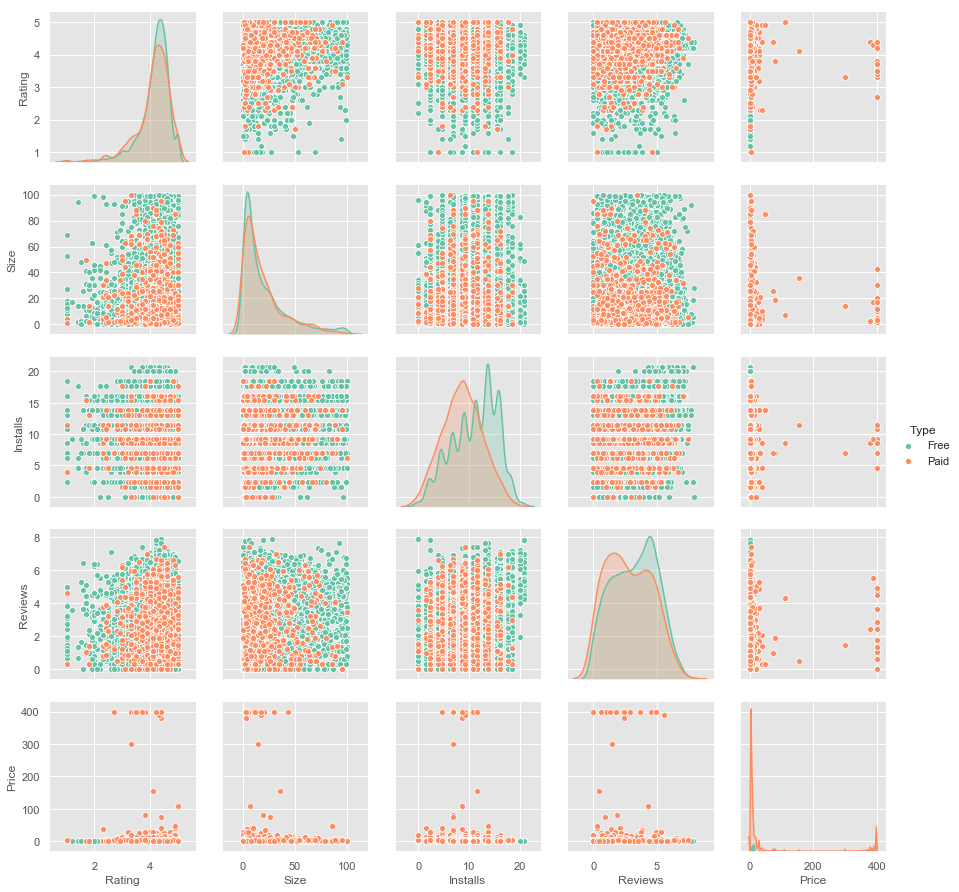

In [31]:
x = gd['Rating'].dropna()
y = gd['Size'].dropna()
z = gd['Installs'][gd.Installs!=0].dropna()
p = gd['Reviews'][gd.Reviews!=0].dropna()
t = gd['Type'].dropna()
price = gd['Price']

p = sns.pairplot(pd.DataFrame(list(zip(x, y, np.log(z), np.log10(p), t, price)),
                              columns=['Rating','Size', 'Installs', 'Reviews', 'Type', 'Price']),
                                 hue='Type', palette="Set2")

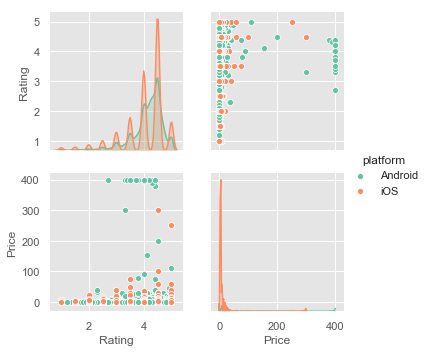

In [32]:
x = md3['Rating'].dropna()
price = md3['Price']
p= md3['platform'].dropna()

p = sns.pairplot(pd.DataFrame(list(zip(x, p, price)),
                              columns=['Rating','platform','Price']),
                              hue='platform', palette="Set2" )

This is the basic exploratory analysis to look for any evident patterns or relationships between the features. 

## More analysis
Then, I want to know the ratio of different categories. 

([<matplotlib.patches.Wedge at 0x1a21c8fac8>,
 [Text(4.399346269001779, 0.0758446136527323, 'BEAUTY'),
  Text(4.393893566488253, 0.23173115106334394, 'COMICS'),
  Text(4.3820257089650045, 0.3973042737874219, 'PARENTING'),
  Text(4.362442956642998, 0.5736649283648955, 'EVENTS'),
  Text(4.3347870094434, 0.7547327889794817, 'ART_AND_DESIGN'),
  Text(4.2965568018200475, 0.9484722709356819, 'HOUSE_AND_HOME'),
  Text(4.2440583041269955, 1.1610207195268727, 'WEATHER'),
  Text(4.176571754131303, 1.3842862357881673, 'LIBRARIES_AND_DEMO'),
  Text(4.094211620241745, 1.6116548044409107, 'AUTO_AND_VEHICLES'),
  Text(3.988677783105802, 1.8575385709476366, 'ENTERTAINMENT'),
  Text(3.849832866678743, 2.130442887908553, 'FOOD_AND_DRINK'),
  Text(3.679056310576478, 2.4134093443938176, 'EDUCATION'),
  Text(3.470876181532702, 2.704259331585818, 'MAPS_AND_NAVIGATION'),
  Text(3.1968225674387876, 3.0232971194234417, 'VIDEO_PLAYERS'),
  Text(2.8501918023886925, 3.3520749826930034, 'DATING'),
  Text(2.4235713

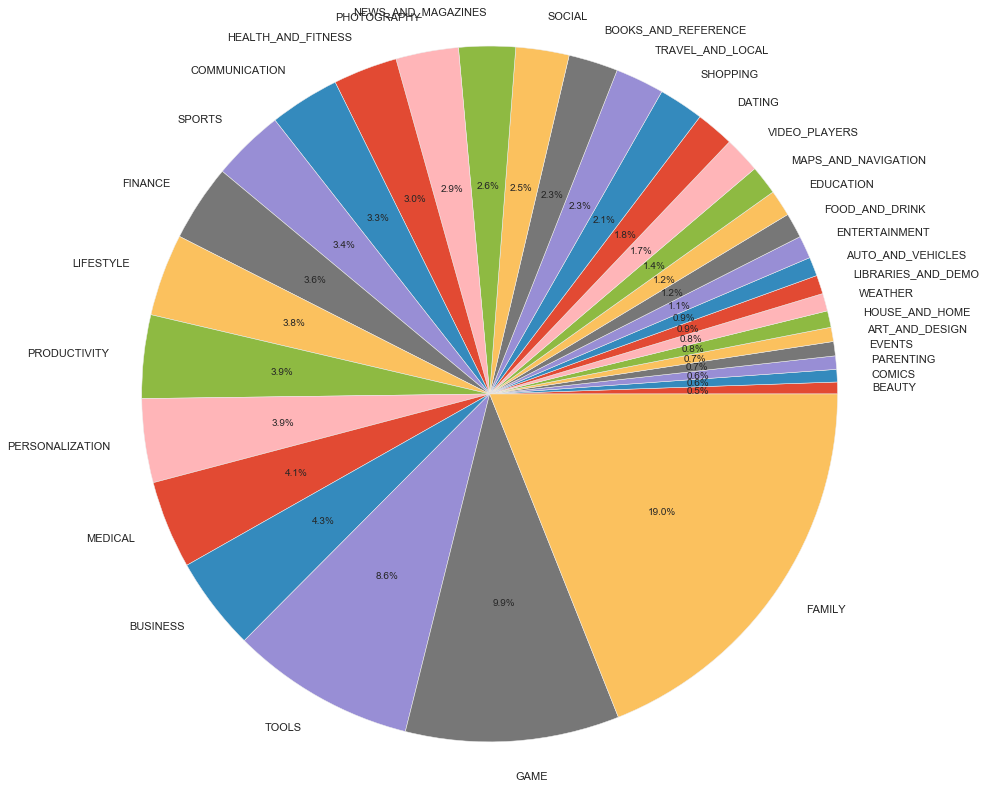

In [33]:

number_of_apps_in_category = gd['Category'].value_counts().sort_values(ascending=True)


plt.pie(x = number_of_apps_in_category.values, 
        labels = number_of_apps_in_category.index, 
        radius = 4, autopct='%1.1f%%'
        )


([<matplotlib.patches.Wedge at 0x1a22440ba8>,
 [Text(4.399986183302243, 0.011026638171551362, 'Catalogs'),
  Text(4.399502607991854, 0.06615740527619002, 'Medical'),
  Text(4.396374441936795, 0.17858265953034488, 'Navigation'),
  Text(4.385143804239611, 0.36126695965580863, 'Food & Drink'),
  Text(4.360068921975563, 0.5914380742079927, 'Reference'),
  Text(4.322509563718798, 0.8221381097841969, 'Business'),
  Text(4.269040231565712, 1.0655024642267954, 'News'),
  Text(4.193952975125575, 1.330698479158723, 'Book'),
  Text(4.097606874561272, 1.6030027765254191, 'Weather'),
  Text(3.977965296598087, 1.8803702026625762, 'Finance'),
  Text(3.8341776716131952, 2.158490579665062, 'Travel'),
  Text(3.6340894120109932, 2.4806035849183155, 'Sports'),
  Text(3.357644883787428, 2.8436281111242576, 'Shopping'),
  Text(3.0259327908076328, 3.1943279020030384, 'Lifestyle'),
  Text(2.6083284417841086, 3.543532522749027, 'Music'),
  Text(2.110278994670017, 3.860922501767486, 'Social Networking'),
  Text

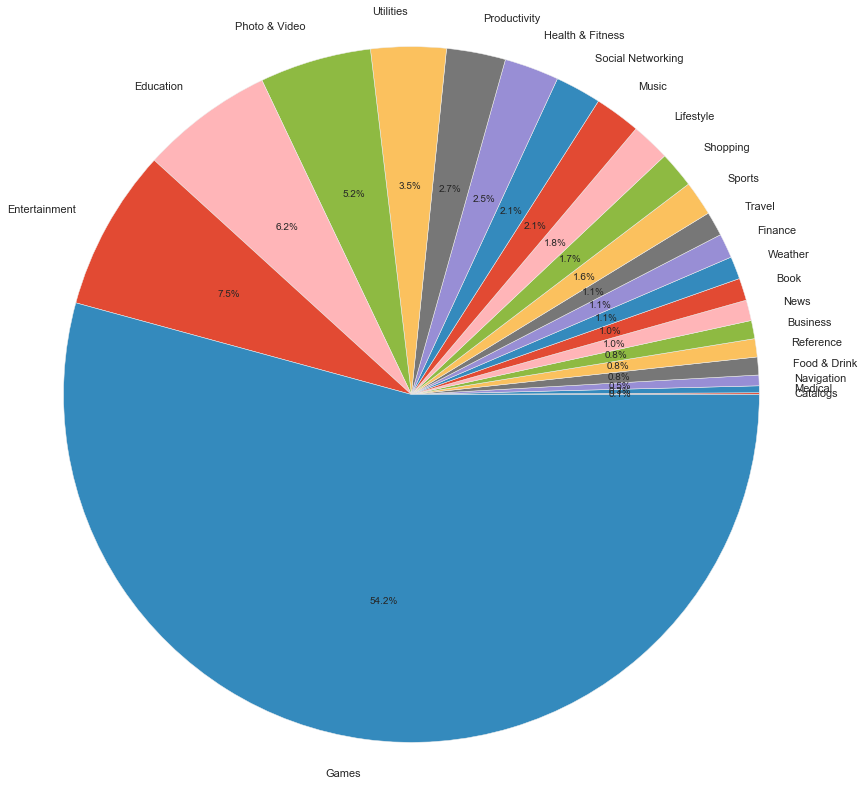

In [34]:
number_of_apps_in_category = ad['prime_genre'].value_counts().sort_values(ascending=True)


plt.pie(x = number_of_apps_in_category.values, 
        labels = number_of_apps_in_category.index, 
        radius = 4, autopct='%1.1f%%'
        )

From the pie chart above, I know Family is the biggest category followed by Game and Tools. 
Then, I want to know what the general rating situation is

In [35]:
gd['Rating'].describe()

count    8196.000000
mean        4.173243
std         0.536625
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

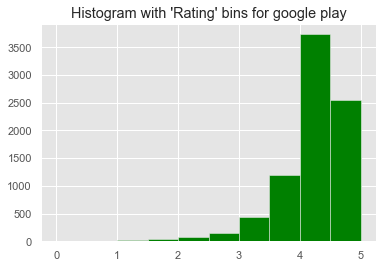

In [36]:
# g = sns.kdeplot(gd.Rating, color="Green", shade = True)
# g.set_xlabel("Rating")
# g.set_ylabel("Frequency")
# plt.title('Distribution of Rating',size = 15)

plt.hist(gd.Rating, bins = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5,4,4.5,5], color = 'green')  # arguments are passed to np.histogram
plt.title("Histogram with 'Rating' bins for google play")
plt.show()

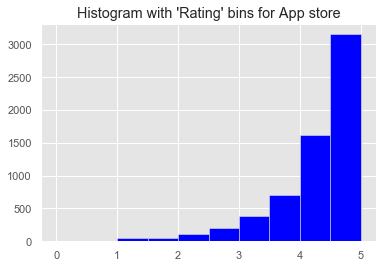

In [37]:
plt.hist(ad.user_rating, bins = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5,4,4.5,5], color = 'Blue')  # arguments are passed to np.histogram
plt.title("Histogram with 'Rating' bins for App store")
plt.show()

Distribute them into different categories

Text(0.5, 1.0, 'Boxplot of Rating VS Category')

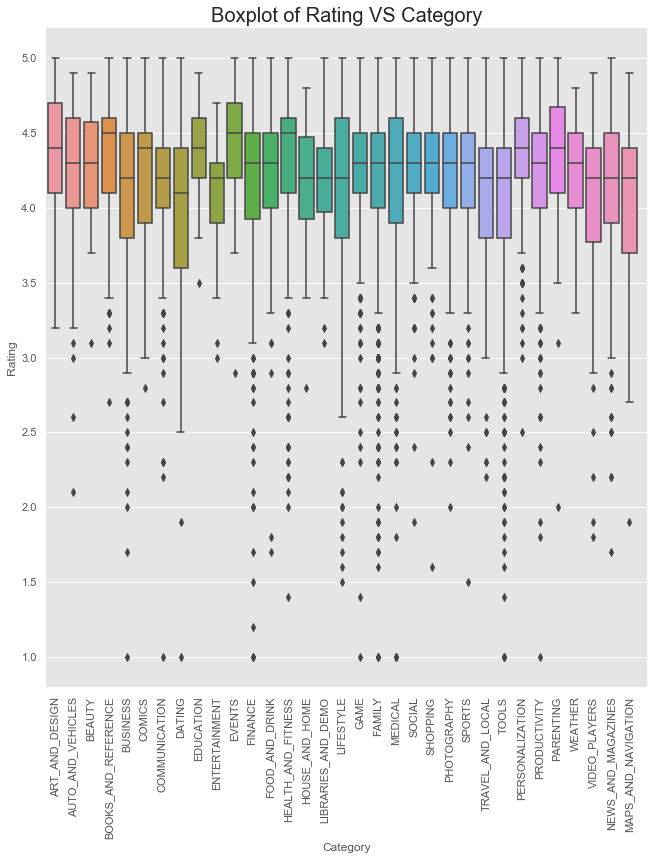

In [38]:
g = sns.catplot(x="Category",y="Rating",data=gd, kind="box", height = 10)
g.despine(left=True)
g.set_xticklabels(rotation=90)
g.set( xticks=range(0,34))
g = g.set_ylabels("Rating")
plt.title('Boxplot of Rating VS Category',size = 20)

Text(0.5, 1.0, 'Boxplot of Rating VS Category')

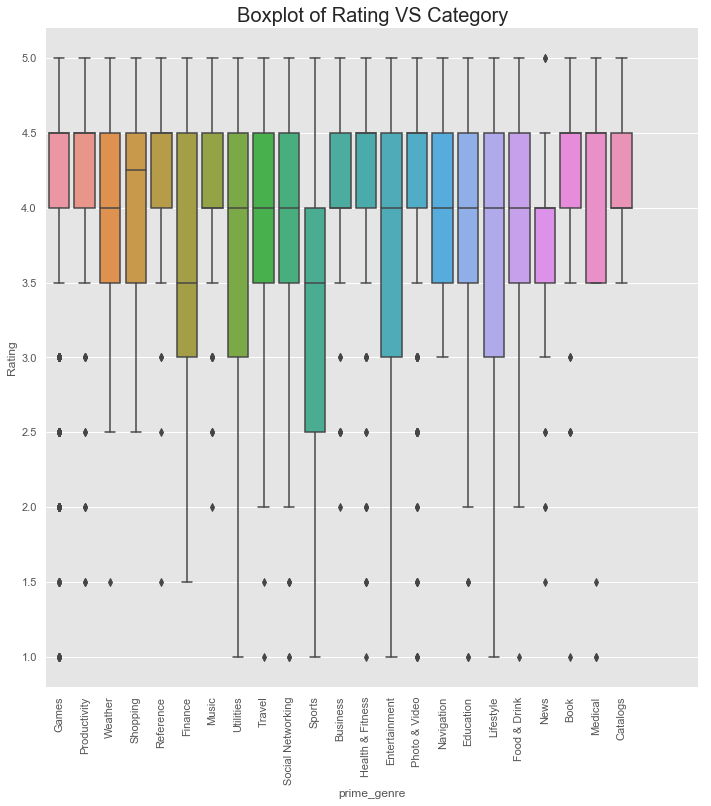

In [39]:
g = sns.catplot(x="prime_genre",y="user_rating",data=ad, kind="box", height = 10)
g.despine(left=True)
g.set_xticklabels(rotation=90)
g.set( xticks=range(0,26))
g = g.set_ylabels("Rating")
plt.title('Boxplot of Rating VS Category',size = 20)

Then, I want to know the correlation between size and the rating

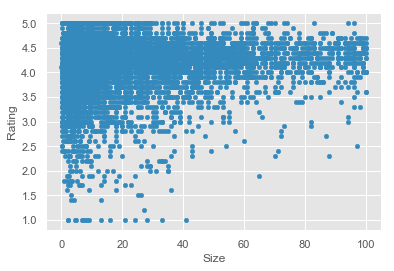

In [40]:
gd.plot.scatter('Size', 'Rating')

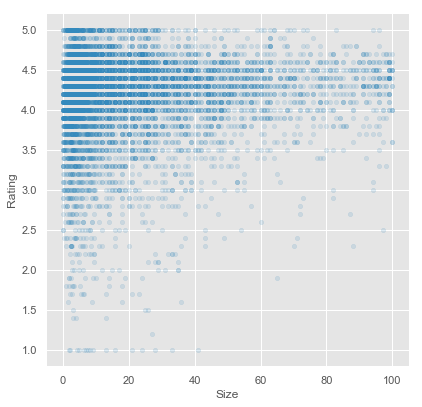

In [41]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
gd.plot.scatter('Size', 'Rating', alpha=0.15,ax=ax)

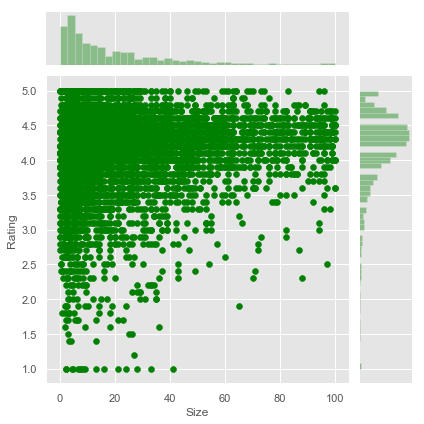

In [42]:

sns.jointplot(data=gd, y='Rating', x='Size', color='green')

Looks like most highly rated apps is around 2-40 MB

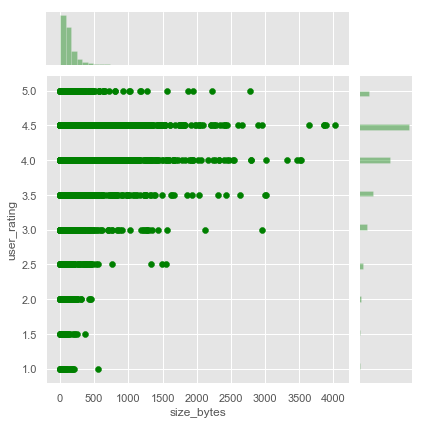

In [43]:

sns.jointplot(data=ad, y='user_rating', x='size_bytes', color='green')

Looks like most of the apps are in the range of (0-500M) let's zoom it in to see more clearly

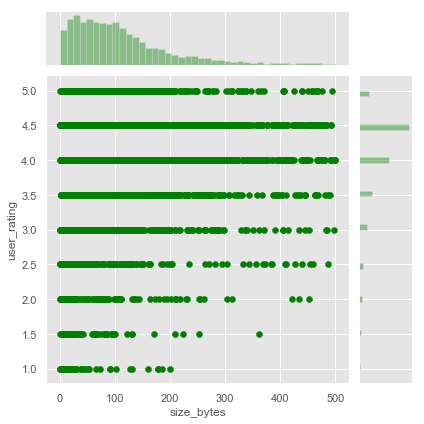

In [44]:
ad2 = ad[ad['size_bytes']<500]
sns.jointplot(data=ad2, y='user_rating', x='size_bytes', color='green')

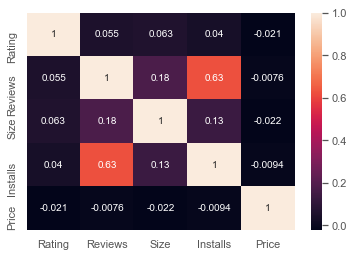

In [45]:
#df['Installs'].corr(df['Reviews'])#df['Insta 
#print(np.corrcoef(l, rating))

corrmat = gd.corr()
#f, ax = plt.subplots()
p =sns.heatmap(corrmat, annot=True)

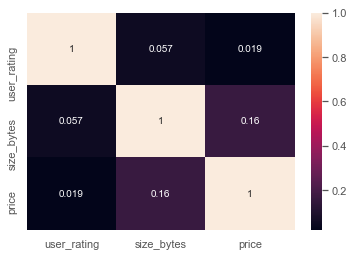

In [46]:
ad1 = pd.DataFrame(data=(ad.user_rating, ad.size_bytes, ad.price)).T
corrmat = ad1.corr()
#f, ax = plt.subplots()
p =sns.heatmap(corrmat, annot=True)